In [745]:
pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [746]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go
import pickle

# Comenzamos a ver el dataset

### Objetivo: Predecir la autonomía (KMS) dependiendo del clima a partir de unos parametros dados

In [747]:
data = pd.read_csv('evdataset.csv')

In [748]:
data.shape

(194, 27)

In [749]:
data.head(3)

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4


In [750]:
# Vemos la cantidad de valores nulos
data.isnull().sum()

id                             0
Make                           0
link                           0
City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Length                         0
Width                          0
Height                         0
Wheelbase                      0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Seats                          0
dtype: int64

In [751]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Make                         194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [752]:
data['Make'].unique()

array(['Genesis', 'Mercedes', 'Porsche', 'BMW', 'Volkswagen', 'CUPRA',
       'Skoda', 'MG', 'Volvo', 'Fiat', 'Smart', 'Hyundai', 'Peugeot',
       'Citroen', 'Audi', 'Polestar', 'Toyota', 'Kia', 'DS', 'Ford',
       'Honda', 'JAC', 'Nissan', 'Renault', 'Opel', 'Hongqi', 'Lexus',
       'Dacia', 'Mazda', 'Seres', 'Tesla', 'Jaguar', 'Mini', 'Subaru'],
      dtype=object)

In [753]:
data['Make'].value_counts()

Mercedes      24
Porsche       18
Audi          16
Volkswagen    13
Peugeot       12
Citroen       11
Toyota         8
BMW            8
MG             8
Fiat           8
Ford           7
Kia            6
Opel           6
Hyundai        5
Renault        5
Skoda          5
Tesla          4
Genesis        4
Volvo          4
CUPRA          4
Polestar       2
Honda          2
Smart          2
Hongqi         2
DS             1
JAC            1
Nissan         1
Lexus          1
Dacia          1
Mazda          1
Seres          1
Jaguar         1
Mini           1
Subaru         1
Name: Make, dtype: int64

In [754]:
data.columns

Index(['id', 'Make', 'link', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats'],
      dtype='object')

### Creamos un dataframe para explicar cada variable

In [810]:
variables = [
    {'id': 'Nº de referencia', 'Make': 'Empresa fabricante', 'City - Cold Weather': 'KMS de autonomía en ciudad con frío','Highway - Cold Weather': 'KMS de autonomía en autopista con frío','Combined - Cold Weather': 'KMS de autonomía en combinado con frío', 'City - Mild Weather': 'KMS de autonomía en ciudad con calor','Highway - Mild Weather': 'KMS de autonomía en autopista con calor','Combined - Mild Weather': 'KMS de autonomía en combinado con calor','Acceleration 0 - 100 km/h' : 'Segundos de aceleración de 0 a 100 km/h','Top Speed':'Velocidad Máxima','Electric Range':'Autonomía eléctrica según fabricante','Total Power':'Potencia eléctrica','Total Torque':'Fuerza del vehículo','Drive':'Tipo de tracción (Delantera:1)(Trasera:2)(4X4:3)','Battery Capacity':'KW de capacidad de carga','Charge Power':'KW de potencia de carga','Charge speed':'KMs de autonomía tras una hora de carga','Fastcharge Speed':'KMs de autonomía tras una hora de carga rápida','Length':'Longitud del vehículo','Width':'Anchura del vehículo','Height':'Altura del vehículo','Wheelbase':'Distancia entre los ejes','Gross Vehicle Weight':'Peso bruto del vehículo','Max. Payload':'Carga máxima del vehículo','Cargo Volume':'Volumen de carga','Seats':'Nº de asientos'}
,]

dfnuevo = pd.DataFrame(variables)

dfnuevo=dfnuevo.set_index('id')

In [811]:
dfnuevo.to_csv('dfnuevo.csv')


### Vemos las correlaciones entre variables

C:\Users\Nacho\AppData\Local\Temp\ipykernel_4040\2194189982.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Nacho\AppData\Local\Temp\ipykernel_4040\2194189982.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



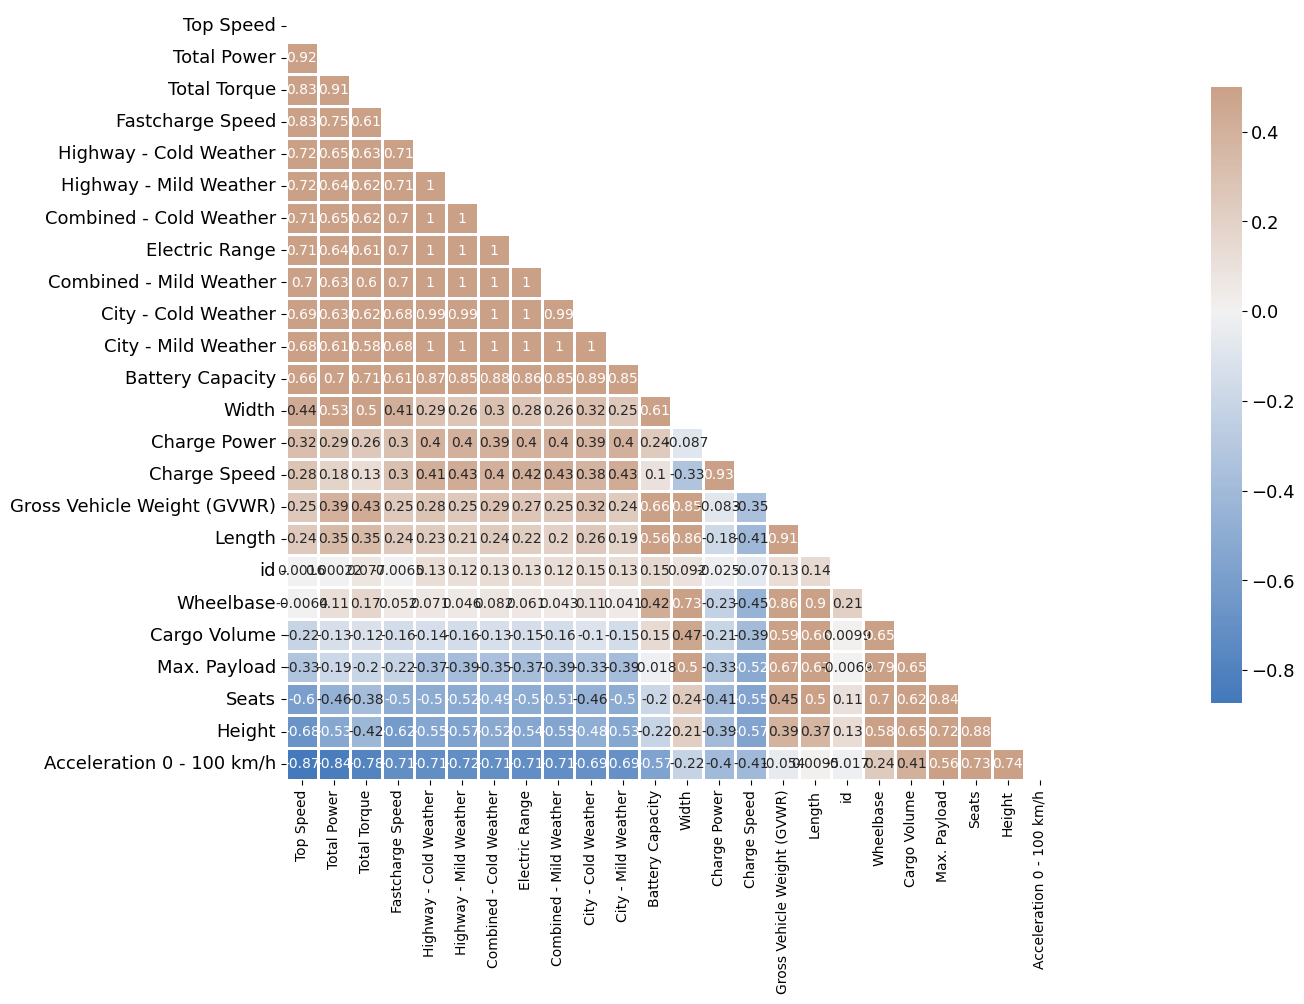

In [757]:
corr = data.corr(method = 'pearson').sort_values(by = 'Top Speed', axis = 0, ascending = False).sort_values(by = 'Top Speed', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40,10))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 1112, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
corr = sns.heatmap(corr.iloc[0:50,0:50], mask=mask[0:50,0:50], cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=2, cbar_kws={"shrink": .8}, annot = True)

plt.savefig('corr.png')

## Como tenemos una correlación tan fuerte entre 'Electric Range' y los tipos de conducción según el clima, podemos proseguir graficando

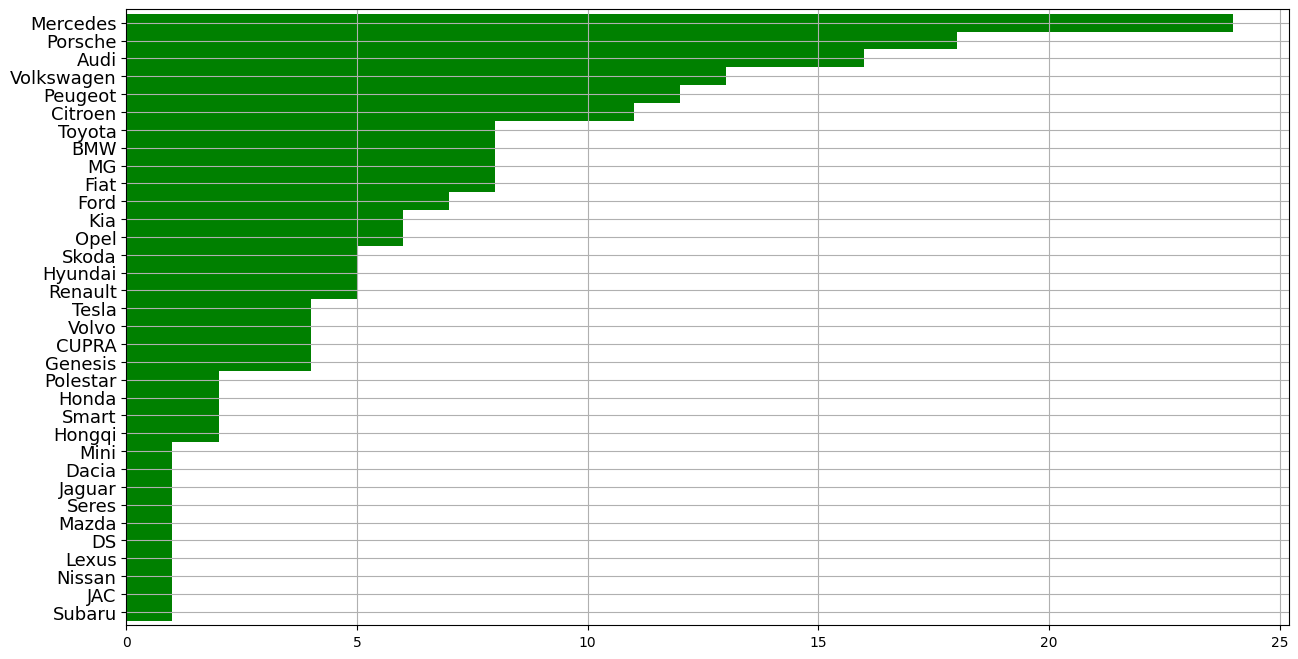

In [758]:
ma=data['Make'].value_counts()
ma = ma.sort_values()
ma.plot(kind='barh',stacked=True, color = ['g'],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.savefig('ma.png')

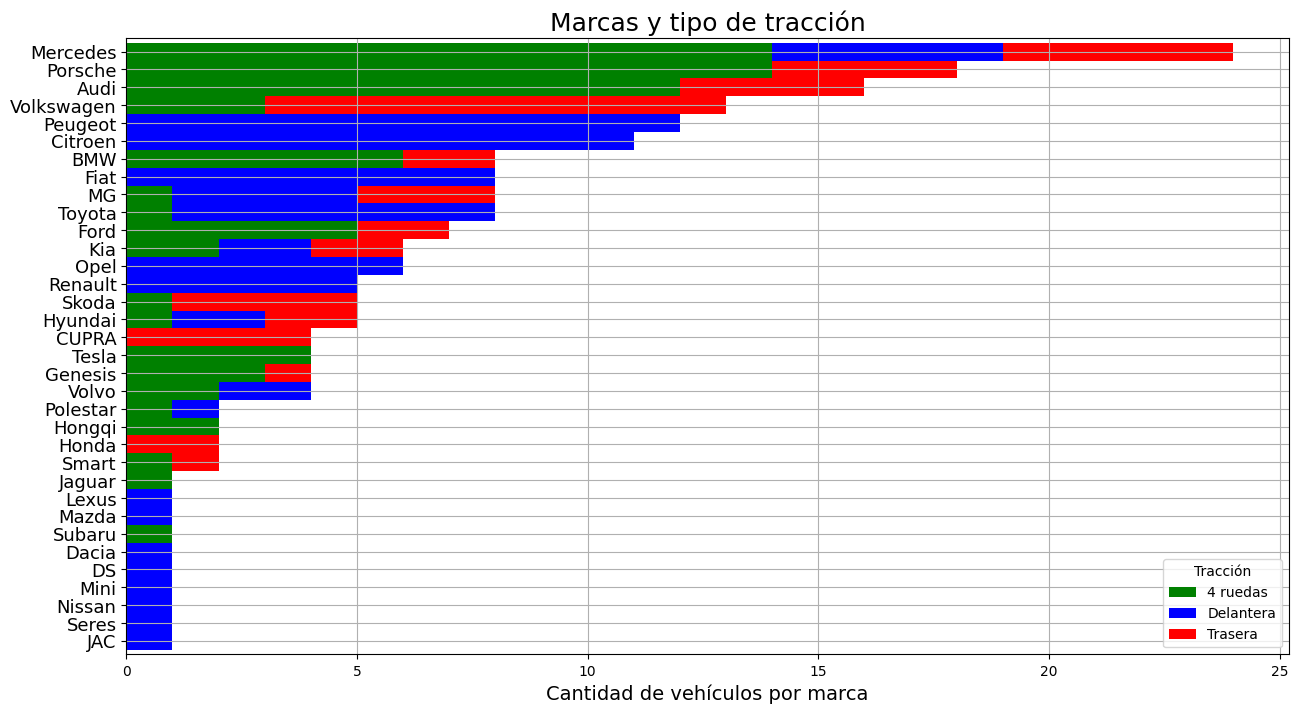

In [759]:
marca = data.groupby(['Make','Drive']).Drive.count()
marca = marca.unstack()
marca['total'] = marca['AWD'].fillna(0) + marca['Front'].fillna(0) + marca['Rear'].fillna(0)
marca = marca.sort_values(by=['total'])
marca = marca.drop(['total'],axis=1)



marca.plot(kind='barh',stacked=True, color = ["g","b","r"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Marcas y tipo de tracción', fontsize=18)
plt.legend(title='Tracción',labels=['4 ruedas', 'Delantera', 'Trasera'])
plt.xlabel('Cantidad de vehículos por marca', fontsize=14)
plt.ylabel("")
plt.rc('ytick', labelsize=13)
plt.savefig('matt.png')

In [760]:
# Vemos la media de autonomía según la marca
data3 = data.groupby('Make')['Electric Range'].mean().sort_values(ascending=False)
me = px.scatter(data3)
me.update_traces(marker=dict(
        color='green'),showlegend=False)
me.update_xaxes(tickangle=90)

In [761]:
me.write_html("me.html")

In [762]:
#top 10 marcas por autonomía
data2 = data.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(n=10) 
data2
fig = go.Figure(data =[go.Pie (labels=data2.index.values, values= data2,textinfo='label+percent')])
fig.show()
fig.write_html("marcauto.html")

In [763]:
# Distribución de coches según la tracción
data1 = data['Drive'].value_counts()
data1
#graficamos
fig = go.Figure(data =[go.Pie (labels=data1.index.values, values= data1,textinfo='label+percent')])
fig.update_layout(showlegend=False)
fig.show()
fig.write_html("trac.html")

In [764]:
fig = px.scatter_matrix (data, dimensions=['Electric Range','Drive'], color ='Make') 
fig.show()

c:\Users\Nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [812]:
fig.write_html(r"auton.html")

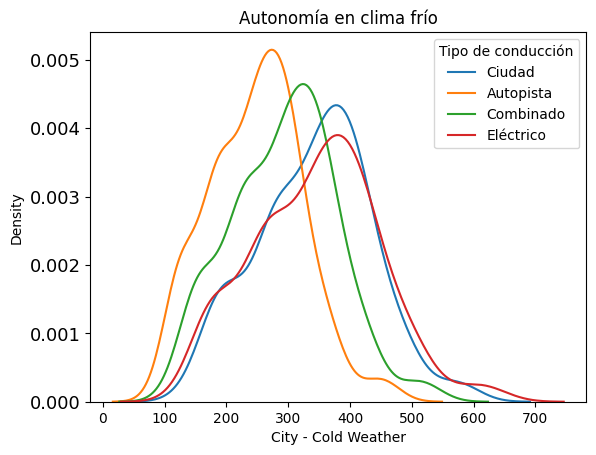

In [766]:
sns.kdeplot(data['City - Cold Weather'])
sns.kdeplot(data['Highway - Cold Weather'])
sns.kdeplot(data['Combined - Cold Weather'])
sns.kdeplot(data['Electric Range'])
plt.title('Autonomía en clima frío')
plt.legend(title='Tipo de conducción',labels=['Ciudad', 'Autopista', 'Combinado', 'Eléctrico'])
plt.savefig('frio.png')

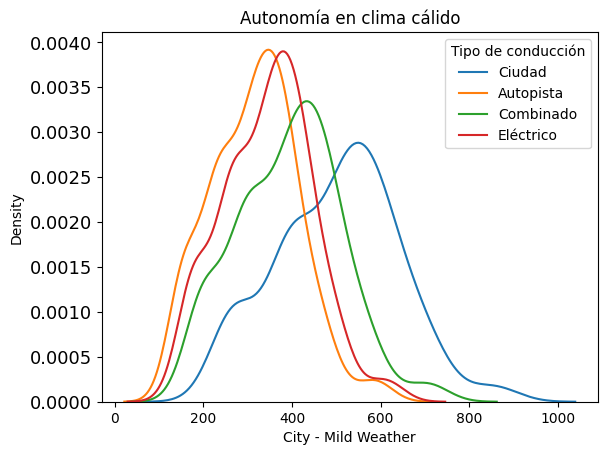

In [767]:
sns.kdeplot(data['City - Mild Weather'])
sns.kdeplot(data['Highway - Mild Weather'])
sns.kdeplot(data['Combined - Mild Weather'])
sns.kdeplot(data['Electric Range'])
plt.title('Autonomía en clima cálido')
plt.legend(title='Tipo de conducción', labels=['Ciudad', 'Autopista', 'Combinado', 'Eléctrico'])
plt.savefig('caliente.png')


# Sustituimos las columnas de clima y tipo de conducción por la media de los tipos de conducción agrupados en clima

In [768]:
data['Range Cold Weather'] = (data['City - Cold Weather']+data['Highway - Cold Weather']+data['Combined - Cold Weather'])/3

In [769]:
data['Range Hot Weather'] = (data['City - Mild Weather']+data['Highway - Mild Weather']+data['Combined - Mild Weather'])/3

In [770]:
data.head(1)

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,Range Cold Weather,Range Hot Weather
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,4515,1890,1580,2900,2495,595,432,5,331.666667,458.333333


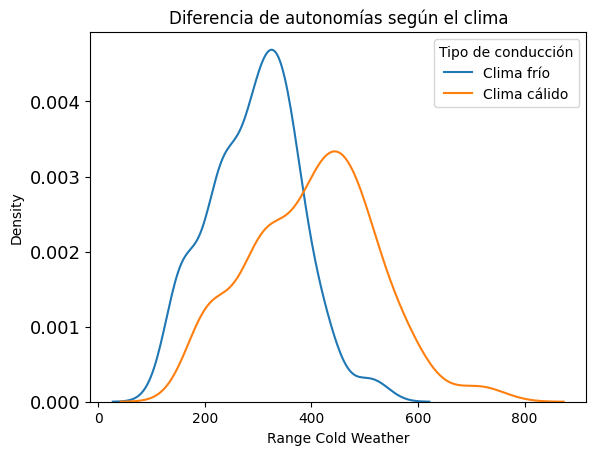

In [771]:
sns.kdeplot(data['Range Cold Weather'])
sns.kdeplot(data['Range Hot Weather'])
plt.title('Diferencia de autonomías según el clima')
plt.legend(title='Tipo de conducción', labels=['Clima frío', 'Clima cálido'])
plt.savefig('difr.png')

In [772]:
# Eliminamos las columnas que nos sobran 
df = data.drop(['City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather','Combined - Mild Weather','link','id'],axis=1)

In [773]:
# Redondeamos las columnas objetivo
df = df.round({'Range Cold Weather':2,'Range Hot Weather':2})

In [774]:
# Sustituimos las palabras de tipos de tracción por números
df['Drive'] = df['Drive'].replace({'Front':1, 'Rear':2, 'AWD':3})
df['Drive'] = df['Drive'].astype(float)

## Utilizamos un diccionario para cambiar las marcas a números

In [777]:
df['Make'] = df['Make'].replace({'Genesis':1,'Mercedes':2,'Porsche':3,'BMW':4,'Volkswagen':5, 'CUPRA':6,
       'Skoda':7, 'MG':8, 'Volvo':9, 'Fiat':10, 'Smart':11, 'Hyundai':12, 'Peugeot':13,
       'Citroen':14, 'Audi':15, 'Polestar':16, 'Toyota':17, 'Kia':18, 'DS':19, 'Ford':20,
       'Honda':21, 'JAC':22, 'Nissan':23, 'Renault':24, 'Opel':25, 'Hongqi':26, 'Lexus':27,
       'Dacia':28, 'Mazda':29, 'Seres':30, 'Tesla':31, 'Jaguar':32, 'Mini':33, 'Subaru':34})

In [778]:
df['Make'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
      dtype=int64)

# Machine Learning

In [779]:
df = df.reset_index()
df = df.drop('index', axis = 1)

In [780]:
df.to_csv('df.csv')

In [781]:
df2 = df

In [782]:
# Vemos un ejemplo de los coches
pers1 = df2.sample().transpose()
pers1.to_csv('pers1.csv')

In [783]:
X, y = df2.loc[:, ~df.columns.isin(['Range Cold Weather'])], df.loc[:, 'Range Cold Weather']

In [784]:
X = X.drop(columns=['Range Hot Weather'])

In [785]:
X.columns

Index(['Make', 'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats'],
      dtype='object')

C:\Users\Nacho\AppData\Local\Temp\ipykernel_4040\1400627785.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



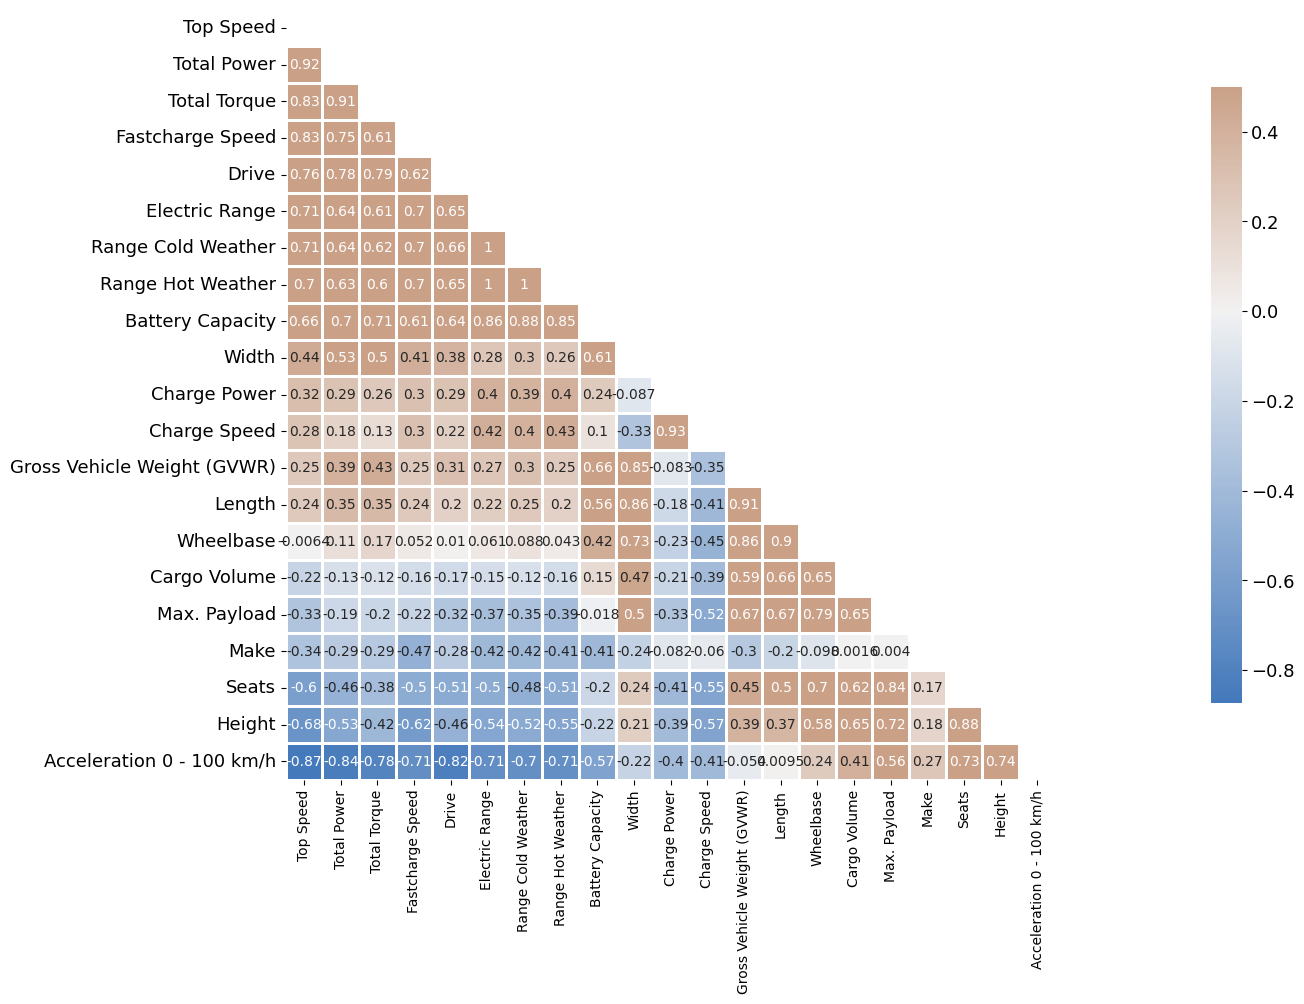

In [786]:
#Correlación nueva
corr = df2.corr(method = 'pearson').sort_values(by = 'Top Speed', axis = 0, ascending = False).sort_values(by = 'Top Speed', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40,10))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 1112, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
corr = sns.heatmap(corr.iloc[0:50,0:50], mask=mask[0:50,0:50], cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=2, cbar_kws={"shrink": .8}, annot = True)

## Modelización

In [787]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [788]:
df2 = df2.drop(['Range Cold Weather', 'Range Hot Weather'],axis=1)
df2['Make'] = df2['Make'].replace({'Genesis':1,'Mercedes':2,'Porsche':3,'BMW':4,'Volkswagen':5, 'CUPRA':6,
       'Skoda':7, 'MG':8, 'Volvo':9, 'Fiat':10, 'Smart':11, 'Hyundai':12, 'Peugeot':13,
       'Citroen':14, 'Audi':15, 'Polestar':16, 'Toyota':17, 'Kia':18, 'DS':19, 'Ford':20,
       'Honda':21, 'JAC':22, 'Nissan':23, 'Renault':24, 'Opel':25, 'Hongqi':26, 'Lexus':27,
       'Dacia':28, 'Mazda':29, 'Seres':30, 'Tesla':31, 'Jaguar':32, 'Mini':33, 'Subaru':34})

In [789]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

#Partición de los datos
from sklearn.model_selection import KFold
from sklearn import *

#Escalado de datos
from sklearn.preprocessing import StandardScaler

#Modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


#Escalado de datos         //El escalado de datos, ahora mismo, no hace falta.
scaler = StandardScaler()
scaler.fit(df2)
X_train = scaler.transform(df2.iloc[X_train.index,:])
X_test = scaler.transform(df2.iloc[X_test.index,:])

#Partición de datos de entrenamiento para analizar modelos
n_splits = 8
kf = KFold(n_splits = n_splits)

#Diccionario de modelos
models={'OLS': LinearRegression(),
        'SVR': SVR(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'RandomForest': RandomForestRegressor(),
        'XGB': GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
       }


#Bucle
for name, model in models.items():
  print('Probamos modelo {}:'.format(name))
  rsme = []
  for train_idx, test_idx in kf.split(X_train, y_train):
    model.fit(X_train[train_idx,:], y_train.values[train_idx])
    y_pred = model.predict(X_train[test_idx,:])
    rsme.append(np.sqrt(sum((y_train.iloc[test_idx]-y_pred)**2)))
  print('El RMSE medio de las estimaciones es: {:.3f}'.format(np.mean(rsme)))

Probamos modelo OLS:
El RMSE medio de las estimaciones es: 7.548
Probamos modelo SVR:
El RMSE medio de las estimaciones es: 313.651
Probamos modelo Ridge:
El RMSE medio de las estimaciones es: 13.018
Probamos modelo Lasso:
El RMSE medio de las estimaciones es: 10.481
Probamos modelo ElasticNet:
El RMSE medio de las estimaciones es: 99.734
Probamos modelo RandomForest:
El RMSE medio de las estimaciones es: 27.383
Probamos modelo XGB:
El RMSE medio de las estimaciones es: 71.229


In [793]:
# Predecir la autonomía según el X_test
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(X_train,y_train)
clf.predict([list(df.iloc[0,:19].values)])

array([27570.20205791])

In [794]:
def change_column_names(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df
change_column_names(df2)
df2.columns

Index(['Make', 'Acceleration_0_-_100_km/h', 'Top_Speed', 'Electric_Range',
       'Total_Power', 'Total_Torque', 'Drive', 'Battery_Capacity',
       'Charge_Power', 'Charge_Speed', 'Fastcharge_Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross_Vehicle_Weight_(GVWR)', 'Max._Payload',
       'Cargo_Volume', 'Seats'],
      dtype='object')

In [795]:
# Guardamos el modelo
pickle.dump(clf, open('Frio.pkl', 'wb'))

In [796]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

### Hemos comprobado que para la variable objetivo 'Range Cold Weather' tenemos un error de 7 con lo cual la predicción va a ser muy buena. Ahora es hora de hacer lo mismo pero con 'Range Hot Weather'

In [797]:
df3=df

In [798]:
X1, y1 = df3.loc[:, ~df.columns.isin(['Range Hot Weather'])], df.loc[:, 'Range Hot Weather']

In [799]:
X1 = X1.drop(columns=['Range Cold Weather'])

In [804]:
df3 = df3.drop(['Range Cold Weather', 'Range Hot Weather'],axis=1)
df3['Make'] = df2['Make'].replace({'Genesis':1,'Mercedes':2,'Porsche':3,'BMW':4,'Volkswagen':5, 'CUPRA':6,
       'Skoda':7, 'MG':8, 'Volvo':9, 'Fiat':10, 'Smart':11, 'Hyundai':12, 'Peugeot':13,
       'Citroen':14, 'Audi':15, 'Polestar':16, 'Toyota':17, 'Kia':18, 'DS':19, 'Ford':20,
       'Honda':21, 'JAC':22, 'Nissan':23, 'Renault':24, 'Opel':25, 'Hongqi':26, 'Lexus':27,
       'Dacia':28, 'Mazda':29, 'Seres':30, 'Tesla':31, 'Jaguar':32, 'Mini':33, 'Subaru':34})

In [805]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.2, random_state=123)

#Partición de los datos
from sklearn.model_selection import KFold

#Escalado de datos
from sklearn.preprocessing import StandardScaler

#Modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


#Escalado de datos         //El escalado de datos, ahora mismo, no hace falta.
scaler = StandardScaler()
scaler.fit(df3)
X_train = scaler.transform(df3.iloc[X_train.index,:])
X_test = scaler.transform(df3.iloc[X_test.index,:])


#Partición de datos de entrenamiento para analizar modelos
n_splits = 8
kf = KFold(n_splits = n_splits)

#Diccionario de modelos
models={'OLS': LinearRegression(),
        'SVR': SVR(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'RandomForest': RandomForestRegressor(),
        'XGB': GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
       }


#Bucle
for name, model in models.items():
  print('Probamos modelo {}:'.format(name))
  rsme = []
  for train_idx, test_idx in kf.split(X_train, y_train):
    model.fit(X_train[train_idx,:], y_train.values[train_idx])
    y_pred = model.predict(X_train[test_idx,:])
    rsme.append(np.sqrt(sum((y_train.iloc[test_idx]-y_pred)**2)))
  print('El RMSE medio de las estimaciones es: {:.3f}'.format(np.mean(rsme)))

Probamos modelo OLS:
El RMSE medio de las estimaciones es: 8.965
Probamos modelo SVR:
El RMSE medio de las estimaciones es: 458.913
Probamos modelo Ridge:
El RMSE medio de las estimaciones es: 18.255
Probamos modelo Lasso:
El RMSE medio de las estimaciones es: 14.580
Probamos modelo ElasticNet:
El RMSE medio de las estimaciones es: 146.696
Probamos modelo RandomForest:
El RMSE medio de las estimaciones es: 39.701
Probamos modelo XGB:
El RMSE medio de las estimaciones es: 103.098


In [806]:
# Predecir la autonomía según el X_test
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(X_train,y_train)
clf.predict([list(df.iloc[0,:19].values)])

array([40542.97932951])

In [807]:
def change_column_names(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df
change_column_names(df3)
df3.columns

Index(['Make', 'Acceleration_0_-_100_km/h', 'Top_Speed', 'Electric_Range',
       'Total_Power', 'Total_Torque', 'Drive', 'Battery_Capacity',
       'Charge_Power', 'Charge_Speed', 'Fastcharge_Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross_Vehicle_Weight_(GVWR)', 'Max._Payload',
       'Cargo_Volume', 'Seats'],
      dtype='object')

In [809]:
# Guardamos el modelo
pickle.dump(clf, open('Caliente.pkl', 'wb'))

In [808]:
pickle.dump(scaler, open('hot.pkl', 'wb'))

### Ya tenemos la predicción hecha para 'Range Hot Weather' con un error de 8, con lo cual también va a ser buena